In [6]:
from shapely.geometry import shape
import shapefile
import matplotlib.pyplot as plt
from shapely.geometry import shape
import numpy as np
import random
import math
from shapely.geometry import Polygon
from shapely.geometry import Point
import collections
from collections import OrderedDict
from itertools import islice
from shapely.ops import cascaded_union
from itertools import combinations
from shapely.geometry import Polygon,MultiPolygon
import geopandas

In [14]:
def merge_two_dicts(x, y):
        z = x.copy()   # start with x's keys and values
        z.update(y)    # modifies z with y's keys and values & returns None
        return z

camera location (633971, 3302715.8556662682) 
camera location (634419, 3302715.8556662682) 
camera location (633971, 3303491.8144280589) 
camera location (634201, 3303103.8350471635) 
camera location (633523, 3302715.8556662682) 
camera location (633753, 3301551.917523582) 
camera location (634419, 3303491.8144280589) 
camera location (633305, 3301551.917523582) 
camera location (634201, 3302327.8762853728) 
camera location (633753, 3303103.8350471635) 
camera location (633523, 3303491.8144280589) 
camera location (633753, 3302327.8762853728) 
camera location (633523, 3301939.8969044774) 
camera location (633305, 3302327.8762853728) 
camera location (633305, 3303103.8350471635) 
camera location (633075, 3303491.8144280589) 
camera location (633305, 3303879.7938089543) 
camera location (633971, 3301939.8969044774) 
0.756473672646
12
18
camera location (633915, 3302667.3582436563) 
camera location (633265, 3301524.204710661) 
camera location (633265, 3303810.5117766517) 
camera location 

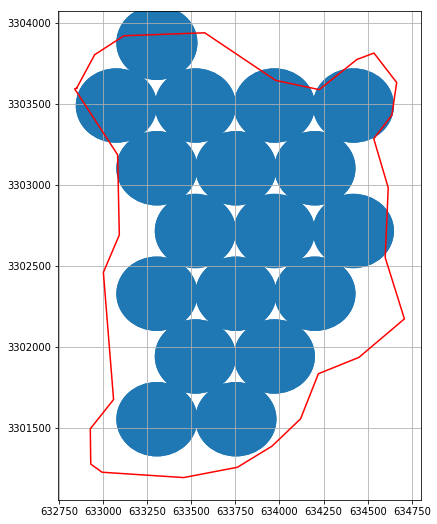

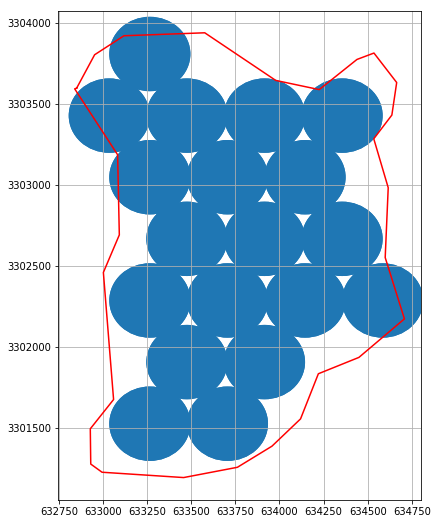

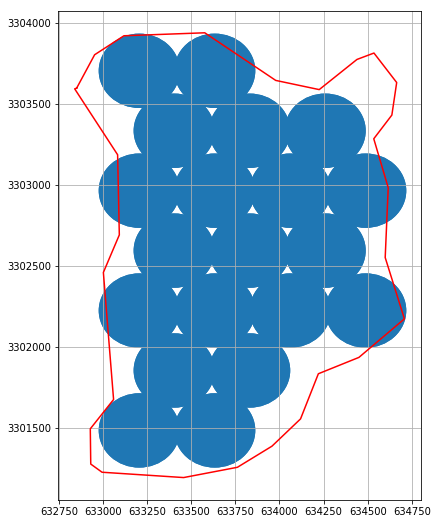

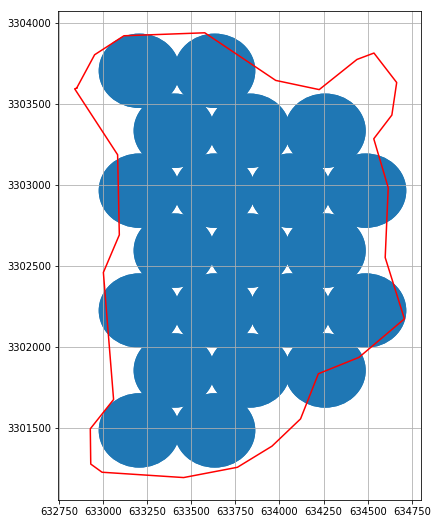

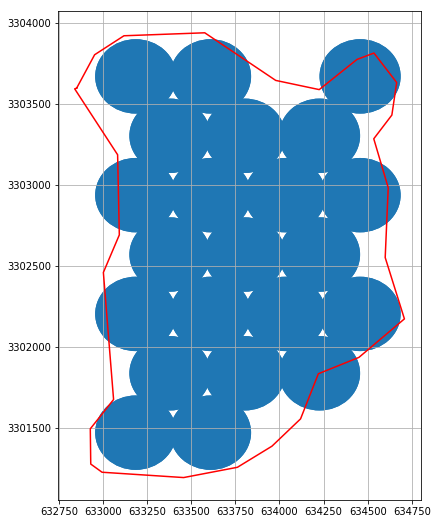

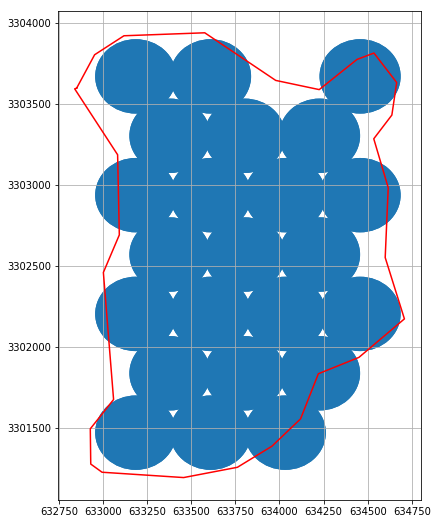

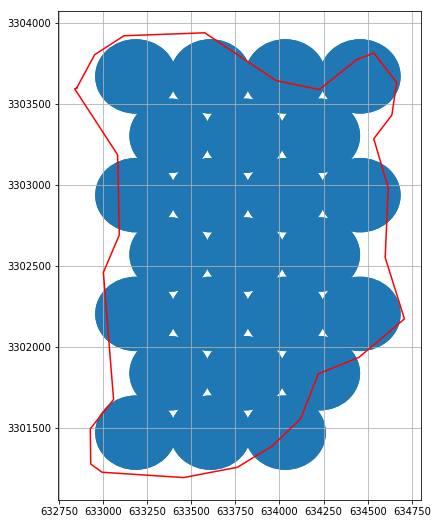

In [19]:
## Codes for number of cameras from 17 to 24 with overlapping with hexagonal circle packing
## algorithm
global_rate = 0
global_dict={}
for h in range(18,25):
    for l in range(10):
        final_dict = {}
        shape = shapefile.Reader("Shapefile_Meters.shp")
        finalpol = polygon
        coord = []
        for shape in shape.shapeRecords():
            for i in shape.shape.points[:]:
                point = []
                x = i[0]
                point.append(x)
                y = i[1]     
                point.append(y)    
                coord.append(point)
        polygon = Polygon(coord)
        total_region = polygon.area
        total_camera = h
        global_coverage = 0
        final_dict = {} 
        r = 230

        overlap_length_x = l * 4
        overlap_length_y = (overlap_length_x) * math.sqrt(3) 
        times_x = round((460 - 2*overlap_length_x)/30)
        times_y = round((460 - 2*overlap_length_y)/30)
        for j in range(int(times_x)):
            for k in range(int(times_y)):
                list_center = []
                for i in range(8):
                    for x in np.arange(631065 ,634750 + 1000, 460 - overlap_length_x):
                        for y in np.arange(3300000 + (230*math.sqrt(3))*i*2 - (i)*overlap_length_y, 3300000  + 230*math.sqrt(3) + (230*math.sqrt(3))*i*2 - (i + 0.5)*overlap_length_y, 460 - overlap_length_y):
                            point = []
                            point.append(x + 30*j)
                            point.append(y + 30*k)
                            list_center.append(point)
                            circle = Point(0, 1).buffer(230)
                            if finalpol.intersection(circle).area/circle.area == 1.0:
                                nonoverlap = (finalpol.symmetric_difference(circle)).difference(circle)
                                outmulti.append(nonoverlap)
                                finalpol = MultiPolygon(outmulti)
                    for x in np.arange(631065 - 230, 634750 + 1000, 460 - overlap_length_x):
                        for y in np.arange(3300000 + 230*math.sqrt(3) +(230*math.sqrt(3))*i*2 - (i + 0.5)*overlap_length_y, 3300000  + 230*math.sqrt(3)*2+ (230*math.sqrt(3))*i*2 - (i + 1.0)*overlap_length_y, 460 - overlap_length_y):
                            point = []
                            point.append(x + 10*j)
                            point.append(y + 10*k)
                            list_center.append(point)
                            if finalpol.intersection(circle).area/circle.area == 1.0:
                                nonoverlap = (finalpol.symmetric_difference(circle)).difference(circle)
                                outmulti.append(nonoverlap)
                                finalpol = MultiPolygon(outmulti)

                d_incomplete = {}
                d_complete = {}
                for i in list_center:
                    circle = Point(i[0], i[1]).buffer(230)
                    temp = []
                    temp.append(i[0])
                    temp.append(i[1])
                    rate = polygon.intersection(circle).area/circle.area
                    if rate > 0 and rate < 1:
                        d_incomplete[tuple(temp)] = rate
                    elif rate == 1:
                        d_complete[tuple(temp)] = rate
                order_d_incom = {}
                order_d_incom=OrderedDict(sorted(d_incomplete.items(), key=lambda t: t[1], reverse = True))

                left_camera = total_camera - len(d_complete)
                selected_d = {}
                selected_d = dict(islice(order_d_incom.items(), left_camera))


                acum = sum(selected_d.values())
                circle = Point(0, 1).buffer(230)
                coverage_rate = (acum + len(d_complete)) * circle.area / total_region


                if global_coverage < coverage_rate:
                    final_dict = merge_two_dicts(d_complete, selected_d) 
                    global_coverage = coverage_rate

        r = 230

        finalpol = polygon
        finalpol = geopandas.GeoDataFrame({'geometry': finalpol, 'df1':[1,2]})
        outmulti = []
        for key in final_dict:
            circle = Point(key[0], key[1]).buffer(230)

            df2 = geopandas.GeoDataFrame({'geometry': circle, 'df2':[1,2]})
            finalpol = geopandas.overlay(finalpol, df2, how='difference') 

        current = 1 - ((finalpol.intersection(polygon)).area/polygon.area).values[0]
        if global_rate < current:
            global_rate = current
            test = {}

            global_dict = merge_two_dicts(final_dict, test)
            global_length = l * 4

    shape = shapefile.Reader("Shapefile_Meters.shp")
    fig, ax = plt.subplots(figsize=(6.5,9.0))
    for shape in shape.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]    
        y = [i[1] for i in shape.shape.points[:]] 
        plt.plot(x,y, 'r-')
        ax.grid() 
    for key in global_dict:
        ax.add_artist(plt.Circle((key[0],key[1]),r))
    for x in list(global_dict):
        ax.add_artist(plt.Circle((x[0],x[1]),r))
        print("camera location {} ".format(x))  
    print(global_rate)
    print(global_length)
    print(total_camera)